In [203]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pandas.io.parsers import read_csv

In [204]:
def lee_csv(filename):
    valores = read_csv(filename, header= None).values
    return valores

In [205]:
def funcion_ec_normal(X, Y):
    #np.linalg.pinv < pseudo-inversa de dos matrices
    #np.matmul < producto de dos matrices
    return np.matmul(np.matmul(np.linalg.pinv((np.matmul(np.transpose(X),X))),np.transpose(X)), Y) #X NO se normaliza    

In [206]:
def normalizar_matriz(X):
    #X_norm = [][] # tiene las mismas dimensiones que X, con los valores normalizados
    mu = np.mean(X, axis = 0) # medias de cada atributo
    sigma = np.std(X, axis = 0) # desviación estándar de cada atributo
    X_norm = (X -  mu) / sigma
        
    # El valor de cada atributo ahora será el cociente entre su diferencia con la media y la desviación estándar
    # de ese atributo en los ejemplos de entrenamiento
    return np.array(X_norm), mu, sigma

In [207]:
def hipotesis(x, THETA):
    return np.dot(np.transpose(THETA),x) # Se devuelve (la matriz traspuesta de THETA)*x

In [208]:
def funcion_coste_vectorizada(X, Y, THETA, num_muestras):
    normal = (np.dot(X,THETA) - Y)
    tras = np.transpose(np.dot(X,THETA)) - Y
   
    return (1 / 2 * num_muestras) * np.dot(tras, normal)

In [209]:
def descenso_gradiente(X, Y, THETA, num_muestras, alpha = 0.01, iteraciones = 1500):
    #Nos vamos acercando iterativamente al valor de theta
    #que minimiza la función de coste J
    #Hay que computar el valor de la hipótesis en cada iteración
    #utilizando los valores de los parámetros thetaj obtenidos en 
    #la iteración anterior      
    aux = THETA
    for i in range(0, len(THETA)):
        THETA[i] = THETA[i] - alpha * np.mean((hipotesis(X, aux) - Y) * X[i,:])
    
    return THETA

Coste con alpha 0.001: 144604585430192.06
Coste con alpha 0.01: 139236868700438.86
Coste con alpha 0.1: 78393953027142.55
Coste con alpha 1.0: 4513615410391.543


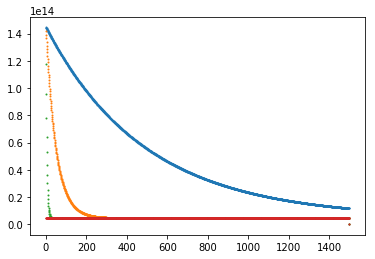

In [213]:
datos_Fichero = lee_csv('ex1data2.csv')
num_muestras = len(datos_Fichero)
iteraciones = 1500

#THETA de ceros
THETA = np.zeros(np.shape(datos_Fichero)[1])

#[:,:] < incluye todos los datos de esa magnitud (en este caso, los del fichero)
vX = datos_Fichero[:,:-1]
vY = datos_Fichero[:,-1]
X_norm, mu, sigma = normalizar_matriz(vX)

#Para añadir la fila de unos directamente, existe la función np.ones
X_norm = np.hstack([np.ones((len(datos_Fichero), 1)), X_norm])

#print(X_norm)
cont = 4
alpha = 0.0001
plt.figure()
for i in range(0, cont):
    alpha = alpha * 10 
   
    #Para cada alpha se reinicia el theta y los costes
    THETA = np.zeros(np.shape(datos_Fichero)[1]) 
    costes = np.empty(iteraciones + 1)  
    #print(THETA) 
    
    for j in range(0, iteraciones):
        THETA = descenso_gradiente(np.transpose(X_norm), vY, THETA, num_muestras, alpha)
        costes[j] = funcion_coste_vectorizada(X_norm, vY, THETA, num_muestras)
    
    print('Coste con alpha ' + str(alpha) +': ' + str(costes[i]))
    
    #s = escala de los puntos
    #marker = cómo se representa cada dato   
    #NO usar plt.plot
    plt.scatter(range(0,iteraciones+1), costes, s = 4, marker = '.')      
    cont = cont + 1

plt.show() 

In [211]:
X = datos_Fichero[:,:-1]
Y = datos_Fichero[:,-1]

X = np.hstack([np.ones((len(datos_Fichero), 1)), X])
#np.hstack([np.ones((len(datos_Fichero), 1)), X_norm])

newTheta = funcion_ec_normal(X, Y)

#SUPERFICIE: 1650 pies cuadrados y 3 habitaciones 
#USAR MU Y SIGMA DE LOS VALORES NO NORMALIZADOS
ejemplo = [1, (1650-mu[0]) / sigma[0], (3-mu[1]) / sigma[1]]
pred1 = hipotesis(ejemplo, THETA)
#[Fila de 1, pies, habitaciones]
pred2 = hipotesis( [1, 1650, 3], newTheta)

print ("Predicción por descenso de gradiente: " + str(pred1))
print ("Predicción por ec. normal: " + str(pred2))

Predicción por descenso de gradiente: 293081.4643348961
Predicción por ec. normal: 293081.4643349892
